In [1]:
import pandas as pd
import numpy as np
import collections
import requests
from nltk import bigrams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import dateutil.parser as parser
# including pandas for opening and creating dataframes from csv files
# numpy is used for type casting to int64 from float64 in this program
#matplot lib for plotting graphs 
f1 = pd.read_csv("/home/vikmachine/BD_final/drugsComTrain_raw.csv", error_bad_lines=False)
f2 = pd.read_csv("/home/vikmachine/BD_final/drugsComTest_raw.csv", error_bad_lines=False)
f2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
uniqueID       53766 non-null int64
drugName       53766 non-null object
condition      53471 non-null object
review         53766 non-null object
rating         53766 non-null int64
date           53766 non-null object
usefulCount    53766 non-null int64
dtypes: int64(3), object(4)
memory usage: 2.9+ MB


In [2]:
dframe1 = pd.DataFrame(f1,columns=['uniqueID','drugName', 'condition', 'review', 'date', 'usefulCount', 'rating'])
dframe1.tail()

,uniqueID,drugName,condition,review,date,usefulCount,rating
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",31-May-15,125,10
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1-Nov-11,34,1
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",15-Mar-14,35,2
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",19-Sep-15,79,10
161296,215220,Lubiprostone,"Constipation, Chronic","""I&#039;ve had chronic constipation all my adu...",13-Dec-14,116,9


In [8]:
#discriptive analysys
dframe2 = pd.DataFrame(f2,columns=['uniqueID','drugName', 'condition', 'review','date', 'usefulCount','rating'])
dframe2.tail()
count=215063

In [20]:
frames = [dframe1, dframe2]
result = pd.concat([dframe1, dframe2], ignore_index=True)
result = result.append(pd.Series([count,'Mortin', 'Headache', 'My head hurts','13-Sep-14','50','10'], index=result.columns ), ignore_index=True)
count+=1
result.tail()


,uniqueID,drugName,condition,review,date,usefulCount,rating
215059,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",8-Oct-16,11,9
215060,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",15-Nov-10,7,8
215061,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",28-Nov-11,20,1
215062,113712,Arthrotec,Sciatica,"""It works!!!""",13-Sep-09,46,9
215063,215068,Mortin,Headache,My head hurts,13-Sep-14,50,10


In [50]:
result = result.append(pd.Series([count,'Accolate','Asthma', 'breathing less','13-Sep-14','50','10'], index=result.columns ), ignore_index=True)
count+=1
print(result.tail())
result.to_csv('drug_analysis.csv', sep=',')

        uniqueID  drugName condition                 review       date  \
215087    215092   tylenol     fever        i am burning up  13-Sep-14   
215088    215093   tylenol     fever        hot temperature  13-Sep-14   
215089    215094  Accolate    Asthma   I am short on breath  13-Sep-14   
215090    215095  Accolate    Asthma      breathing problem  13-Sep-14   
215091    215096  Accolate    Asthma         breathing less  13-Sep-14   

       usefulCount rating  
215087          50     10  
215088          50     10  
215089          50     10  
215090          50     10  
215091          50     10  


In [44]:
result.tail()

,uniqueID,drugName,condition,review,date,usefulCount,rating
215081,215086,Seconal Sodium,Insomnia,sleepy,13-Sep-14,50,10
215082,215087,Seconal Sodium,Insomnia,very sleepy,13-Sep-14,50,10
215083,215088,Seconal Sodium,Insomnia,very tired,13-Sep-14,50,10
215084,215089,Seconal Sodium,Insomnia,cant sleep properly,13-Sep-14,50,10
215085,215090,ibuprofen,fever,high temperature,13-Sep-14,50,10


In [19]:
#result = result.groupby('drugName','uniqueID').nunique()
dataset=pd.read_csv('drug_analysis.csv', error_bad_lines=False)
drug_cnt = pd.DataFrame({'count' : dataset.groupby(["drugName"] ).size()}).reset_index()
#drug_cnt = drug_cnt.reset_index()
drug_cnt

,drugName,count
0,A + D Cracked Skin Relief,1
1,A / B Otic,2
2,Abacavir / dolutegravir / lamivudine,70
3,Abacavir / lamivudine,3
4,Abacavir / lamivudine / zidovudine,1
5,Abatacept,25
6,Abilify,593
7,Abilify Discmelt,3
8,Abilify Maintena,5
9,Abiraterone,12


In [9]:
# this section here is to convert [2637 rows x 1 columns] dataframe column to list first then to tuple
new1 = pd.DataFrame(drug_cnt,columns=['drugName'])
new1 = np.array(new1).tolist()
flat_list1 = []
for sublist in new1:
    for item in sublist:
        flat_list1.append(item)
         
flat_list1 = tuple(flat_list1)
print(flat_list1)

new2 = pd.DataFrame(drug_cnt,columns=['count'])
new2 = np.array(new2).tolist()
flat_list2 = []
for sublist in new2:
    for item in sublist:
        flat_list2.append(item)
flat_list2 = tuple(flat_list2)
print(flat_list2)

('A + D Cracked Skin Relief', 'A / B Otic', 'Abacavir / dolutegravir / lamivudine', 'Abacavir / lamivudine', 'Abacavir / lamivudine / zidovudine', 'Abatacept', 'Abilify', 'Abilify Discmelt', 'Abilify Maintena', 'Abiraterone', 'AbobotulinumtoxinA', 'Abraxane', 'Abreva', 'Absorbine Jr.', 'Absorica', 'Abstral', 'Acamprosate', 'Acanya', 'Acarbose', 'Accolate', 'Accupril', 'Accutane', 'Acebutolol', 'Acetaminophen', 'Acetaminophen / aspirin', 'Acetaminophen / aspirin / caffeine', 'Acetaminophen / aspirin / caffeine / salicylamide', 'Acetaminophen / butalbital', 'Acetaminophen / butalbital / caffeine', 'Acetaminophen / butalbital / caffeine / codeine', 'Acetaminophen / caffeine', 'Acetaminophen / caffeine / dihydrocodeine', 'Acetaminophen / caffeine / isometheptene mucate', 'Acetaminophen / caffeine / magnesium salicylate', 'Acetaminophen / caffeine / pyrilamine', 'Acetaminophen / chlorpheniramine', 'Acetaminophen / chlorpheniramine / dextromethorphan / pseudoephedrine', 'Acetaminophen / chlo

In [10]:
#creating a dictionary to assign a value as an index to each unique drug represented as keys in the dictionary
new_flatlist={k: v for v, k in enumerate(flat_list1)}
new_flatlist.values()

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

In [11]:
#extacting dictionary values 
list_values = [ v for v in new_flatlist.values()]
y_pos = tuple(list_values)

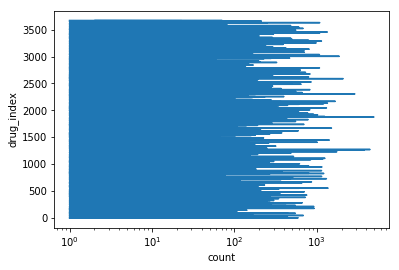

In [12]:
#create graph as follows where the drug index corresponds to a drug in the dictionary
plt.semilogx(flat_list2, y_pos)
#matplotlib function to plot bargraph with semilogx which seperates the bars into more readable form
plt.ylabel('drug_index')
plt.xlabel('count')
plt.show()

In [13]:
drug_cnt.describe()

,count
count,3671.000000
mean,58.584309
std,213.157526
min,1.000000
25%,2.000000
50%,6.000000
75%,30.000000
max,4930.000000


In [14]:
#performing the same for condition and frequency

dataset=pd.read_csv('drug_analysis.csv', error_bad_lines=False)
cond_cnt = pd.DataFrame({'count' : dataset.groupby(["condition"] ).size()}).reset_index()
#cond_cnt = cond_cnt.reset_index()

In [15]:
new3 = pd.DataFrame(cond_cnt,columns=['condition'])
#dataset.groupby(["drugName"])
#np.asarray(new)
new3 = np.array(new3).tolist()
flat_list3 = []
for sublist in new3:
    for item in sublist:
        flat_list3.append(item)
         
flat_list1 = tuple(flat_list1)
print(flat_list1)
new4 = pd.DataFrame(cond_cnt,columns=['count'])
#dataset.groupby(["drugName"])
#np.asarray(new)
new4 = np.array(new4).tolist()
flat_list4 = []
for sublist in new4:
    for item in sublist:
        flat_list4.append(item)
flat_list2 = tuple(flat_list4)
#y_pos = [i for i, _ in enumerate(flat_list2)]
print(flat_list2)
cond_cnt.describe()

('A + D Cracked Skin Relief', 'A / B Otic', 'Abacavir / dolutegravir / lamivudine', 'Abacavir / lamivudine', 'Abacavir / lamivudine / zidovudine', 'Abatacept', 'Abilify', 'Abilify Discmelt', 'Abilify Maintena', 'Abiraterone', 'AbobotulinumtoxinA', 'Abraxane', 'Abreva', 'Absorbine Jr.', 'Absorica', 'Abstral', 'Acamprosate', 'Acanya', 'Acarbose', 'Accolate', 'Accupril', 'Accutane', 'Acebutolol', 'Acetaminophen', 'Acetaminophen / aspirin', 'Acetaminophen / aspirin / caffeine', 'Acetaminophen / aspirin / caffeine / salicylamide', 'Acetaminophen / butalbital', 'Acetaminophen / butalbital / caffeine', 'Acetaminophen / butalbital / caffeine / codeine', 'Acetaminophen / caffeine', 'Acetaminophen / caffeine / dihydrocodeine', 'Acetaminophen / caffeine / isometheptene mucate', 'Acetaminophen / caffeine / magnesium salicylate', 'Acetaminophen / caffeine / pyrilamine', 'Acetaminophen / chlorpheniramine', 'Acetaminophen / chlorpheniramine / dextromethorphan / pseudoephedrine', 'Acetaminophen / chlo

,count
count,916.000000
mean,233.481441
std,1488.819705
min,1.000000
25%,3.000000
50%,11.000000
75%,68.000000
max,38436.000000


In [16]:
new_flatlist1={k: v for v, k in enumerate(flat_list3)}
list_values = [ v for v in new_flatlist1.values() ]
y_pos = tuple(list_values)

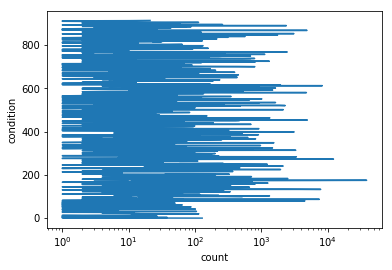

In [17]:
plt.semilogx(flat_list4, y_pos)
#matplotlib function to plot bargraph with count and ratings as y and x axes
plt.ylabel('condition')
plt.xlabel('count')
plt.show()

In [18]:
cond_cnt.describe()

,count
count,916.000000
mean,233.481441
std,1488.819705
min,1.000000
25%,3.000000
50%,11.000000
75%,68.000000
max,38436.000000


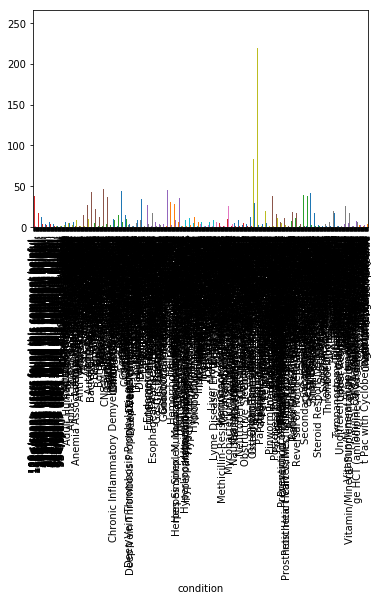

In [19]:
result.groupby('condition')['drugName'].nunique().plot(kind='bar')
plt.show()

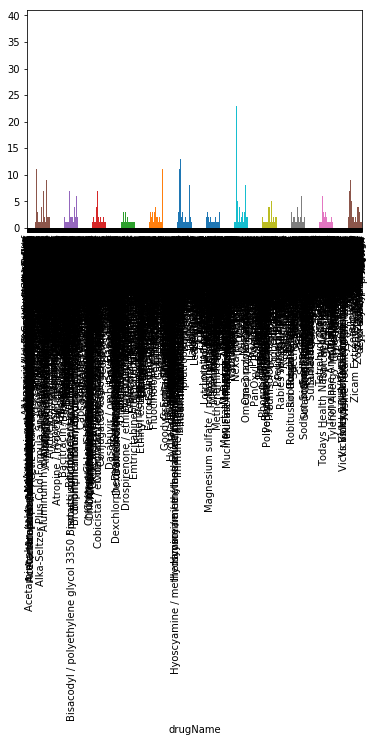

In [20]:
result.groupby('drugName')['condition'].nunique().plot(kind='bar')
plt.show()

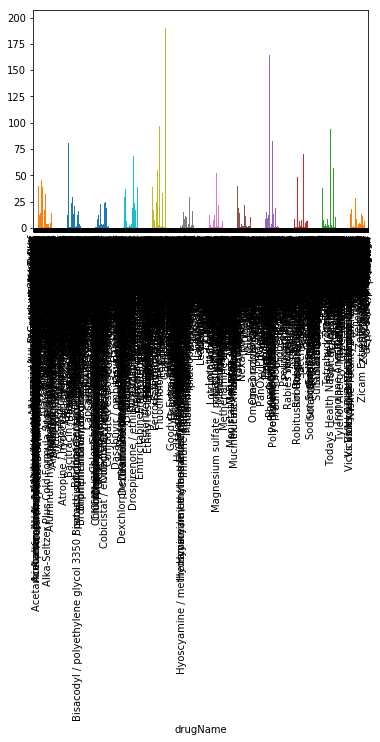

In [21]:
result.groupby('drugName')['usefulCount'].nunique().plot(kind='bar')
plt.show()


In [22]:
#see the most used drugs to treat conditions
dataset['drugName'].value_counts()


Levonorgestrel                                     4930
Etonogestrel                                       4421
Ethinyl estradiol / norethindrone                  3753
Nexplanon                                          2892
Ethinyl estradiol / norgestimate                   2790
Ethinyl estradiol / levonorgestrel                 2503
Phentermine                                        2085
Sertraline                                         1868
Escitalopram                                       1747
Mirena                                             1673
Implanon                                           1506
Gabapentin                                         1415
Bupropion                                          1369
Miconazole                                         1344
Venlafaxine                                        1338
Medroxyprogesterone                                1308
Citalopram                                         1308
Duloxetine                                      

In [23]:
#find the most common conditions that are treated
commonCdf = dataset['condition'].value_counts().nlargest(15)
print(type(commonCdf))

<class 'pandas.core.series.Series'>


In [24]:
commonCdf

Birth Control                38436
Depression                   12164
Pain                          8245
Anxiety                       7812
Acne                          7435
Bipolar Disorde               5604
Insomnia                      4904
Weight Loss                   4857
Obesity                       4757
ADHD                          4509
Diabetes, Type 2              3362
Emergency Contraception       3290
High Blood Pressure           3104
Vaginal Yeast Infection       3085
Abnormal Uterine Bleeding     2744
Name: condition, dtype: int64

In [25]:
#checking out the test data
commonCdf2 = dframe2['condition'].value_counts().nlargest(15)
commonConditions = pd.DataFrame(commonCdf2)
commonConditions

,condition
Birth Control,9648
Depression,3095
Pain,2100
Anxiety,1908
Acne,1847
Bipolar Disorde,1380
Weight Loss,1248
Insomnia,1231
Obesity,1189
ADHD,1126


In [26]:
#establish a dataframe to focus on birth control
BirthControlDf = dframe2[['condition','usefulCount','drugName']]

In [27]:
#locate each instance of birth control use in our dataframe
BirthControlDf=BirthControlDf.loc[BirthControlDf['condition'] == 'Birth Control']

In [28]:
#get the number of times each drug was used for birth control
BirthControlDf['drugName'].value_counts().nlargest(15)

Etonogestrel                          1080
Levonorgestrel                         755
Ethinyl estradiol / norethindrone      744
Nexplanon                              734
Ethinyl estradiol / norgestimate       517
Ethinyl estradiol / levonorgestrel     507
Implanon                               401
Mirena                                 355
Skyla                                  252
Lo Loestrin Fe                         229
NuvaRing                               204
Ethinyl estradiol / etonogestrel       196
Copper                                 193
Sprintec                               166
Drospirenone / ethinyl estradiol       163
Name: drugName, dtype: int64

In [29]:
#dataframe to show the average satifcation of using Etonogestrel for birth control(top choice of drug)
EtonogestrelBCDf = BirthControlDf.loc[BirthControlDf['drugName']=='Etonogestrel']
EtonogestrelBCDf['usefulCount'].mean()

7.358333333333333

In [30]:
#add a column to dataframe with years extracted from the date
dframe1['year'] = [parser.parse(date).date().year for date in dframe1['date']]
dframe2['year'] = [parser.parse(date).date().year for date in dframe2['date']]

In [31]:
# Change in annual average ratings.

ConditionsDict = {}
ConditionsDictYearly = {}
conditions = list(commonCdf.index)[:5]
for condition in conditions:
    cdf = dframe1[['condition','usefulCount','drugName','year']].loc[dframe1['condition'] == condition]
    cdf.reset_index(drop=True)
    drugs = list(cdf['drugName'].value_counts().nlargest(5).index)
    ConditionsDict[condition] = [cdf.loc[cdf['drugName'] == drug].reset_index(drop=True) for drug in drugs]
    ConditionsDictYearly[condition] = [cdf.loc[cdf['drugName'] == drug].groupby(['year']).mean().reset_index() for drug in drugs]

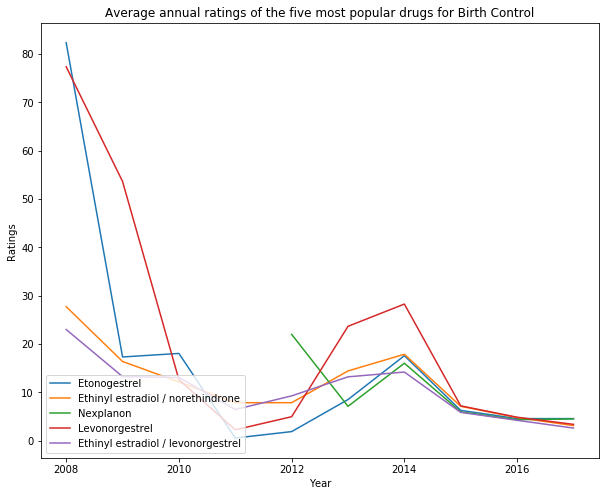

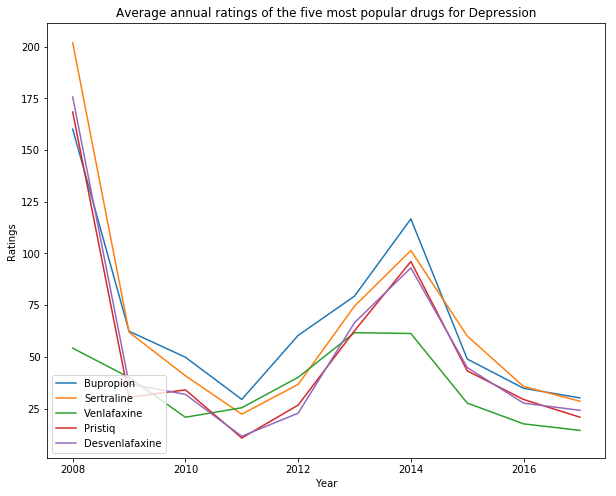

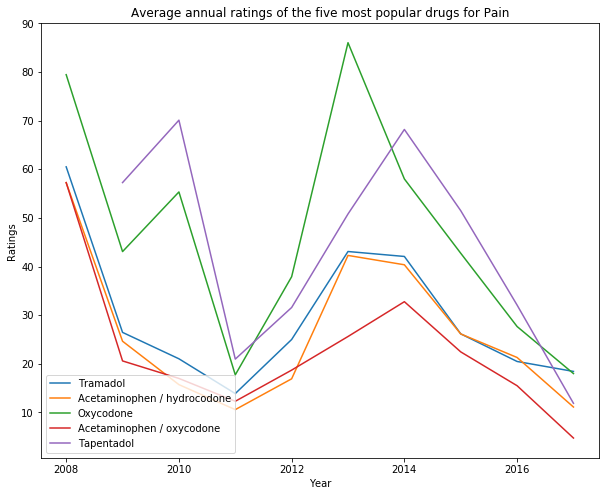

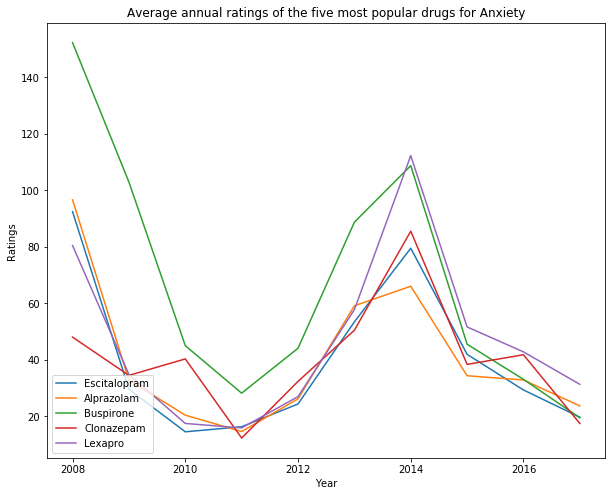

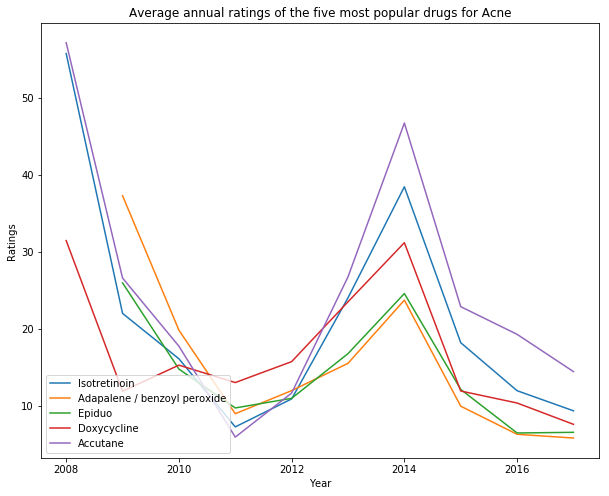

In [32]:
for condition in ConditionsDict:
    drugs = [cdf.at[0, 'drugName'] for cdf in ConditionsDict[condition]]
    fig = plt.figure(figsize=(10, 8))
    cdf = ConditionsDictYearly[condition]
    for i in range(len(drugs)):
        plt.plot(cdf[i]['year'], cdf[i]['usefulCount'], label=drugs[i])
    plt.xlabel('Year')
    plt.ylabel('Ratings')
    plt.legend(loc='lower left')
    plt.title('Average annual ratings of the five most popular drugs for ' + condition)

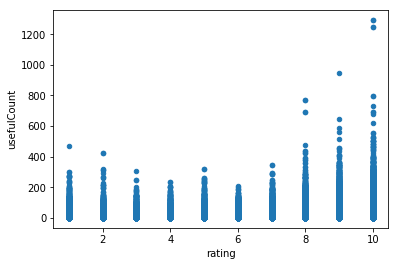

In [33]:
#find a correlation among the rating and useful count
dframe3=pd.DataFrame(f1,columns=['rating','usefulCount'])
dframe3.plot.scatter(x='rating',y='usefulCount')

Text(0.5,1,'Top20 : The number of drugs per condition.')

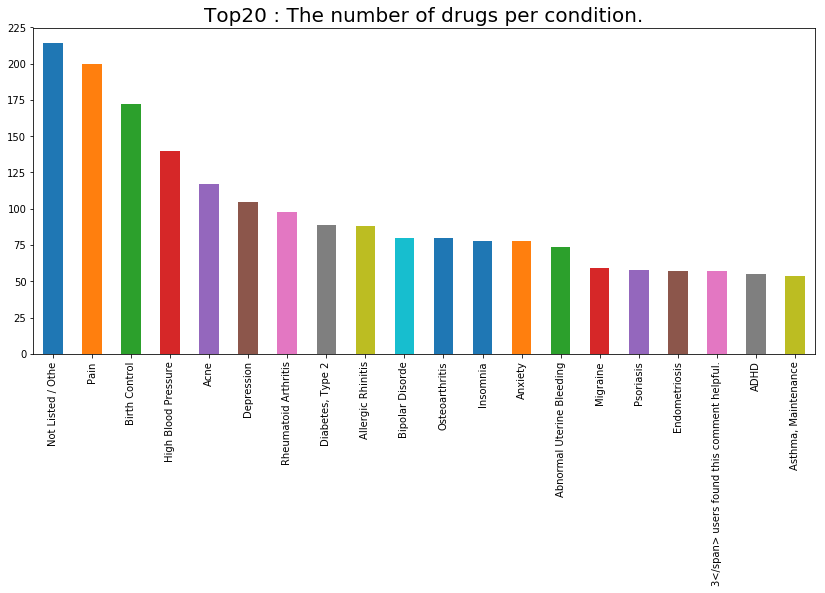

In [34]:
# Depiciting the conditions and the number of drugs per condition for train data
condition_dn = dframe1.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10)
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20)


Text(0.5,1,'Top20 : The number of conditions that a drug can cure.')

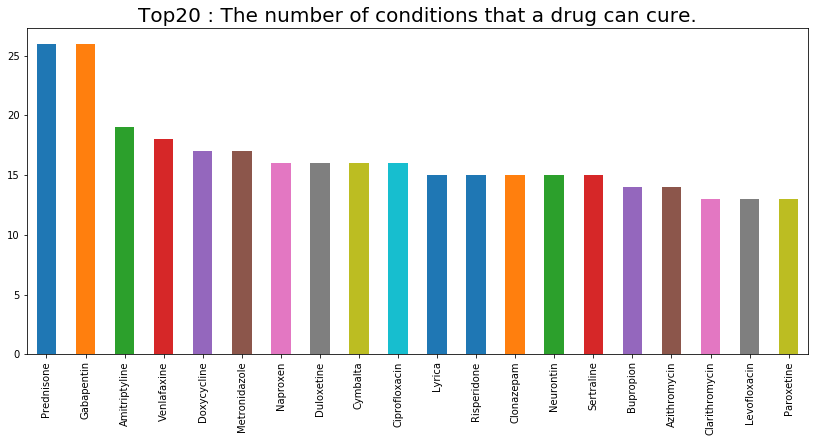

In [35]:
# Depiciting the conditions and the number of drugs per condition for test data
condition_dn = dframe2.groupby(['drugName'])['condition'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10)
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top20 : The number of conditions that a drug can cure.", fontsize = 20)


Text(0.5,1,'The conditions and its reviews')

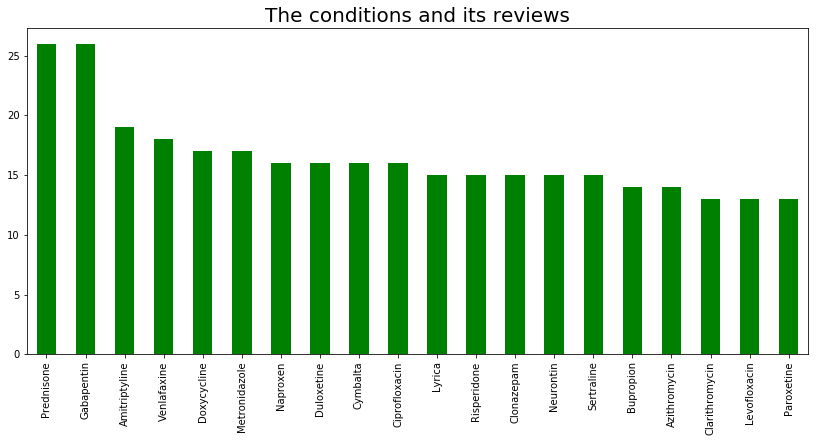

In [34]:
# Depiciting the conditions and the number of drugs per condition for test data
condition_review = dframe1.groupby(['condition'])['review'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("The conditions and its reviews", fontsize = 20)


In [35]:
condition_dn = condition_dn.head(20)
col_names = ['condition','counts']
condition_dn.to_csv('drug_filter.csv', sep=',')
df = pd.read_csv('drug_filter.csv', error_bad_lines=False , names=col_names, header=None)
df.head(19)

,condition,counts
0,Prednisone,26
1,Gabapentin,26
2,Amitriptyline,19
3,Venlafaxine,18
4,Doxycycline,17
5,Metronidazole,17
6,Naproxen,16
7,Duloxetine,16
8,Cymbalta,16
9,Ciprofloxacin,16


In [36]:
dataset1 = pd.read_csv('drug_analysis.csv', error_bad_lines=False)
filter_add1 = dataset1[(dataset1.condition == 'Pain')]
filter_add2 = dataset1[(dataset1.condition == 'Birth Control')]  
filter_add3 = dataset1[(dataset1.condition == 'High Blood Pressure')]
filter_add4 = dataset1[(dataset1.condition == 'Depression')]  
filter_add5 = dataset1[(dataset1.condition == 'Acne')]  

In [37]:
dff = pd.concat([filter_add1,filter_add3,filter_add4,filter_add2,filter_add5], ignore_index=True)
dff.to_csv('drug_filter.csv', sep=',')
dff1 = dff[(dff.condition == 'Pain')]
dff1 =dff1.head(4000)

dff2 = dff[(dff.condition == 'Birth Control')]
dff2 =dff2.head(4000)

dff3 = dff[(dff.condition == 'Acne')]
dff3 =dff3.head(4000)

dff4 = dff[(dff.condition == 'Depression')]
dff4 =dff4.head(4000)

dff5 = dff[(dff.condition == 'High Blood Pressure')]
dff5 =dff5.head(4000)


frames = [dff1, dff2, dff3, dff4, dff5]
dff = pd.concat([dff1, dff2, dff3, dff4, dff5], ignore_index=True)
dff['category_id'] = dff['condition'].factorize()[0]

In [38]:
train, val, test = np.split(df.sample(frac=1), [int(.1*len(df)), int(.9*len(df))])
dff = train[~train["condition"].str.contains("</span> users found this comment helpful.", na=False)]
dff = pd.read_csv('drug_filter.csv', error_bad_lines=False)
col = ['condition', 'review']
dff = dff[col]
dff = dff[pd.notnull(dff['review'])]
dff.columns = ['condition', 'review']
dff=dff.dropna()

dff = dff[(dff.condition == 'Pain')] 
dff['category_id'] = dff['condition'].factorize()[0]
dff=dff.tail(20)
dff

,condition,review,category_id
8225,Pain,"""I have had chronic lower back pain/degenerati...",0
8226,Pain,"""I had a fatal accident 12 months ago a, broke...",0
8227,Pain,"""Used Toradol for intractable Migraine Headach...",0
8228,Pain,"""I have had 15 surgeries for injuries sustaine...",0
8229,Pain,"""Percocet 10/325 is the only medicine which ta...",0
8230,Pain,"""My pain management doctor put me on Butrans p...",0
8231,Pain,"""Mylan patches do not stick as well as the Qua...",0
8232,Pain,"""I had left shoulder hurt when I was a child. ...",0
8233,Pain,"""I started using Etodolac a few weeks ago for ...",0
8234,Pain,"""I have had 15 kindey stones in the past 16 yr...",0


In [39]:
dff = pd.concat([filter_add1,filter_add3,filter_add4,filter_add2,filter_add5], ignore_index=True)
dff.to_csv('drug_filter.csv', sep=',')
dff1 = dff[(dff.condition == 'Pain')]
dff1 =dff1.head(4000)

dff2 = dff[(dff.condition == 'Birth Control')]
dff2 =dff2.head(4000)

dff3 = dff[(dff.condition == 'Acne')]
dff3 =dff3.head(4000)

dff4 = dff[(dff.condition == 'Depression')]
dff4 =dff4.head(4000)

dff5 = dff[(dff.condition == 'High Blood Pressure')]
dff5 =dff5.head(4000)


frames = [dff1, dff2, dff3, dff4, dff5]
dff = pd.concat([dff1, dff2, dff3, dff4, dff5], ignore_index=True)
dff['category_id'] = dff['condition'].factorize()[0]

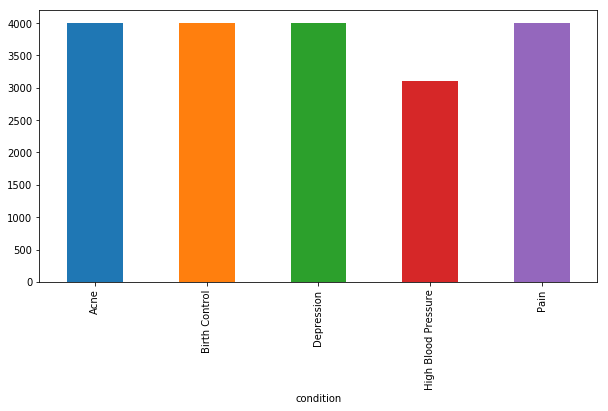

In [40]:
fig = plt.figure(figsize=(10,5))
dff.groupby('condition').review.count().plot.bar(ylim=0)
plt.show()

In [41]:
category_id_df = dff[['condition', 'category_id']].drop_duplicates().dropna().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'condition']].values)

In [42]:
''' 
    sublinear_df is set to True to use a logarithmic form for frequency.
    min_df is the minimum numbers of documents a word must be present in to be kept.
    norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1.
    ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams.
    stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features.
'''
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(dff.review).toarray()
labels = dff.category_id
features.shape

(19104, 27382)

In [43]:
from sklearn.feature_selection import chi2
N = 2
for condition, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    print(feature_names)
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(condition))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

['really worried' 'pill 039' 'decades' ... 'face' 'skin' 'acne']
# 'Acne':
  . Most correlated unigrams:
. skin
. acne
  . Most correlated bigrams:
. dry skin
. cystic acne
['headache 039' 'gym 039' 'attacked' ... 'birth control' 'birth' 'period']
# 'Birth Control':
  . Most correlated unigrams:
. birth
. period
  . Most correlated bigrams:
. mood swings
. birth control
['food time' '50mgs' '039 extremely' ... 'zoloft' 'anxiety' 'depression']
# 'Depression':
  . Most correlated unigrams:
. anxiety
. depression
  . Most correlated bigrams:
. anxiety depression
. depression anxiety
['doc suggested' 'years asked' 'annoying' ... 'blood' 'blood pressure'
 'pressure']
# 'High Blood Pressure':
  . Most correlated unigrams:
. blood
. pressure
  . Most correlated bigrams:
. high blood
. blood pressure
['day usually' 'levels dropped' 'said need' ... 'surgery' 'relief' 'pain']
# 'Pain':
  . Most correlated unigrams:
. relief
. pain
  . Most correlated bigrams:
. chronic pain
. pain relief


/home/vikmachine/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/vikmachine/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/vikmachine/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/vikmachine/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarni

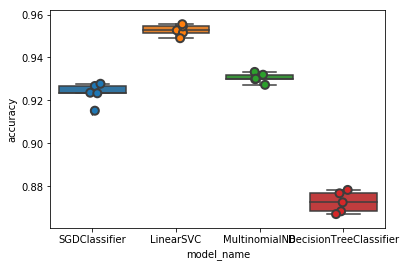

In [44]:
#WARNING 40min to 1 HR required for execution

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

models = [
    #knn(),
    SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=20, tol=0.0, random_state=42),
    LinearSVC(),
    MultinomialNB(),
    tree.DecisionTreeClassifier()
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.savefig('ML_plots.png')


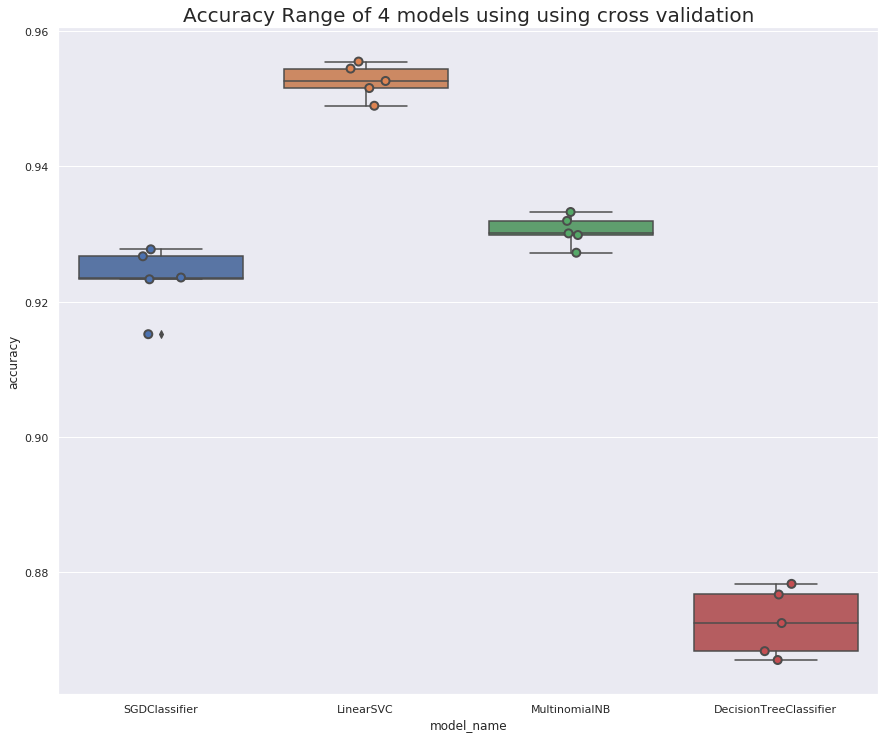

In [54]:
import seaborn as sns
cv_df.to_csv('drug_ML_models.csv', sep=',')
ax = sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
sns.set(rc={'figure.figsize':(12,7)}) 
ax.set_xticklabels(ax.get_xticklabels())
sns.set(rc={'figure.figsize':(14.7,12.27)})
plt.title('Accuracy Range of 4 models using using cross validation', fontsize = 20)
plt.show()


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, dff.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [50]:
dff = pd.DataFrame(dff,columns=['condition','usefulCount','ratings'])

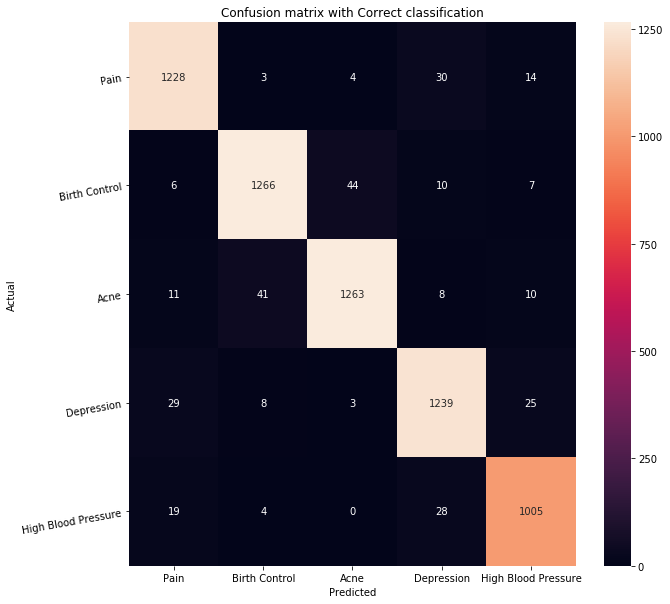

In [51]:

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10,10))
g=sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.condition.values, yticklabels=category_id_df.condition.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix with Correct classification')
g.set_yticklabels(g.get_yticklabels(),rotation=10)
plt.savefig('Confu_m.png')